# ECTE458 Results
## Introduction
This Notebook contains the results gathered throughout the ECTE458 Thesis Research project. The purpose of the file is to catagorise the data and prepare it to be included in the final Thesis.

## Creating and Preliminary Testing of Multiplater Perceptron Predictors
9 Seperate Multi Layer Perceptrons (MLP) were trained to find a suitable candidate for the neural network predictor that would be used later in the experiment.

Each predictor for which statistcs have been recorded are labeled in the following manner (n_1, n_2..., n_k). Each *n* denotes the number of neurons for that layer and *k *denotes the total number of layers. For example MLP (5, 5) denotes a MLP with 2 layers, each consisting of 5 neurons.

In [34]:
import pandas as pd

mlps = [
    {'name': 'mlp_5_5',   'correct': 17252, 'incorrect': 0},
    {'name': 'mlp_10_10', 'correct': 16940, 'incorrect': 312},
    {'name': 'mlp_20_20', 'correct': 17252, 'incorrect': 0},
    {'name': 'mlp_50_50', 'correct': 17252, 'incorrect': 0},
    {'name': 'mlp_8_8',   'correct': 17199, 'incorrect': 53},
    {'name': 'mlp_11_11', 'correct': 17242, 'incorrect': 10},
    {'name': 'mlp_15_15', 'correct': 17236, 'incorrect': 16},
    {'name': 'mlp_10',    'correct': 16774, 'incorrect': 478},
    {'name': 'mlp_20',    'correct': 17225, 'incorrect': 27},
]

df = pd.DataFrame(mlps)
df.set_index('name', inplace=True)

def calculate_mispredictions (row):
    return row['incorrect']/float(row['correct'] + row['incorrect']) * 100

df['misprediction rate'] = df.apply (calculate_mispredictions, axis=1)

df

,correct,incorrect,misprediction rate
name,,,
mlp_5_5,17252,0,0.000000
mlp_10_10,16940,312,1.808486
mlp_20_20,17252,0,0.000000
mlp_50_50,17252,0,0.000000
mlp_8_8,17199,53,0.307211
mlp_11_11,17242,10,0.057964
mlp_15_15,17236,16,0.092743
mlp_10,16774,478,2.770693
mlp_20,17225,27,0.156504


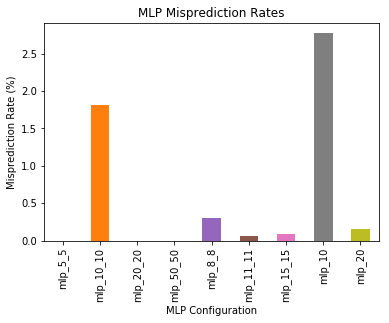

In [35]:
import matplotlib.pyplot as plt

mlp_plot = df.plot.bar(y='misprediction rate', legend=False, title='MLP Misprediction Rates')
mlp_plot.set(xlabel='MLP Configuration', ylabel='Misprediction Rate (%)')
plt.show()

The results show unrealistic prediction accuraccies for the layouts of 5_5, 20_20 and 50_50, most likely due to overfitting. Interestingly there is a reasonable misprediction rate of 1.8% for the 10_10 layout, hence neighbouring layouts were examined to check the consistency. The layouts 8_8, 11_11 and 15_15 all show low misprediction rates, less than 0.5%.

Two single layer MLPs were also examined, the 10 neuron MLP achieved a misprediciton rate of 2.8% and the 20 nueron variant achieved a misprediction rate of 0.2%. 

The simplest MLP, and therefore the quickest, the single layer 10 neuron network achieves a reasonable performance and it is the most feasable network to implement for further testing. The 2.8% misprediciton rate is well below that of other existing dynamic branch prediciton such as GShares 4.25%, which is to be expected of a full neural network.

## Performance of MLP in Gem5 Simulation